In [ ]:
#Import libraries 
import pandas as pd
import seaborn as sns
import numpy as np


import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure 

%matplotlib inline
matplotlib.rcParams['figure.figsize'] =(12,8)


In [ ]:
#Read in the data 
df = pd.read_csv(r"C:\Users\Hp\Downloads\archive (13)\movies.csv")

#looking at the data
df.head()

In [ ]:
#Check for missing values in the database
for col in df.columns:
    missing_values = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,missing_values))

In [6]:
#Checking the data type 
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [9]:
#Changing the data type of budget and gross to int
df['budget'] = df['budget'].astype('int64')

df['gross'] = df['gross'].astype('int64')

In [8]:
#Fill the null values with 0

df = df.fillna(0)
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,0,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,0.0,0,90.0
7664,Dream Round,0,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0.0,0.0,Cactus Blue Entertainment,90.0
7665,Saving Mbango,0,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,0.0,Embi Productions,0.0
7666,It's Just Us,0,Drama,2020,"October 1, 2020 (United States)",0.0,0.0,James Randall,James Randall,Christina Roz,United States,15000.0,0.0,0,120.0


In [12]:
#Creating a new column for Released Country while seperating the country from the date

df[['Release_Date', 'Country']] = df['released'].str.split('(', 1, expand = True)

#Removing the other bracket from the country column

df['Country'] = df['Country'].str.replace(r'[^a-zA-Z ]', '', regex = True)


C:\Users\Hp\AppData\Local\Temp\ipykernel_19572\2797983980.py:3: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[['Release_Date', 'Country']] = df['released'].str.split('(', 1, expand = True)


In [13]:
#Transfer everything in the Country column to the Country Released column
df['Country Released'] = df['Country']
#Clearing the 'Country' column
df['Country'] = ""
df = df.drop('Country', axis = 1)


In [14]:
#Sort the values by the gross earning

df = df.sort_values(by = ['gross'], inplace = False, ascending = False )
#Set the display to the maximum rows
pd.set_option('display.max.rows', None)

<function matplotlib.pyplot.show(close=None, block=None)>

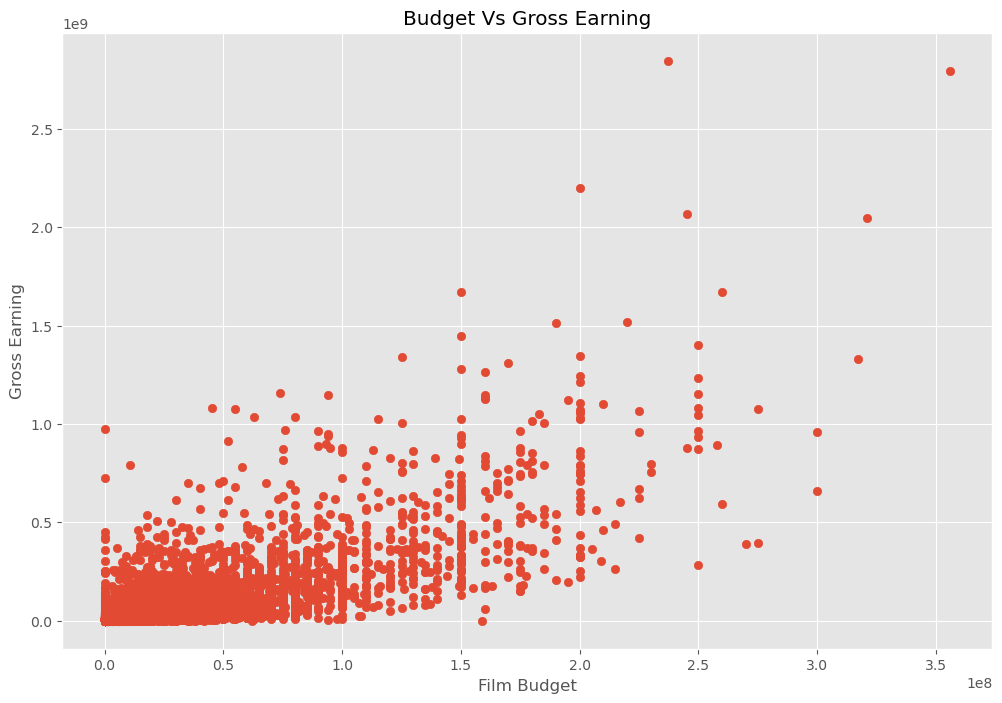

In [15]:
#Find the coorelation between budget and the gross using the scatter plot

plt.scatter(x = df['budget'], y = df['gross'])
plt.title('Budget Vs Gross Earning')
plt.xlabel('Film Budget')
plt.ylabel('Gross Earning')
plt.show

<Axes: xlabel='budget', ylabel='gross'>

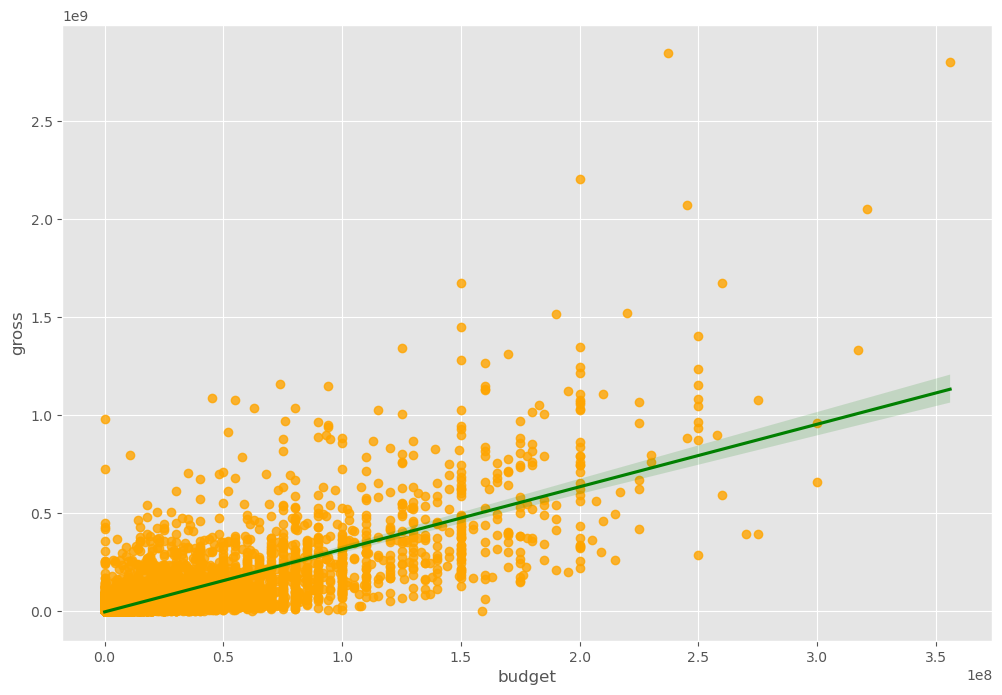

In [16]:
#Checking the correlation by using seaborn
sns.regplot(x = 'budget', y = 'gross', data = df, scatter_kws = {"color": "orange"}, line_kws = {"color": "green"})

In [17]:
#Finding the correlation between the numeric values

df.corr()

C:\Users\Hp\AppData\Local\Temp\ipykernel_19572\3098726106.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,year,score,votes,budget,gross,runtime
year,1.000000,0.092616,0.222427,0.309212,0.261900,0.116358
score,0.092616,1.000000,0.407101,0.056863,0.186012,0.394564
votes,0.222427,0.407101,1.000000,0.486931,0.632870,0.306984
budget,0.309212,0.056863,0.486931,1.000000,0.750157,0.268372
gross,0.261900,0.186012,0.632870,0.750157,1.000000,0.244339
runtime,0.116358,0.394564,0.306984,0.268372,0.244339,1.000000


C:\Users\Hp\AppData\Local\Temp\ipykernel_19572\3577434713.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_matrix = df.corr()


Text(120.72222222222221, 0.5, 'Movie Features')

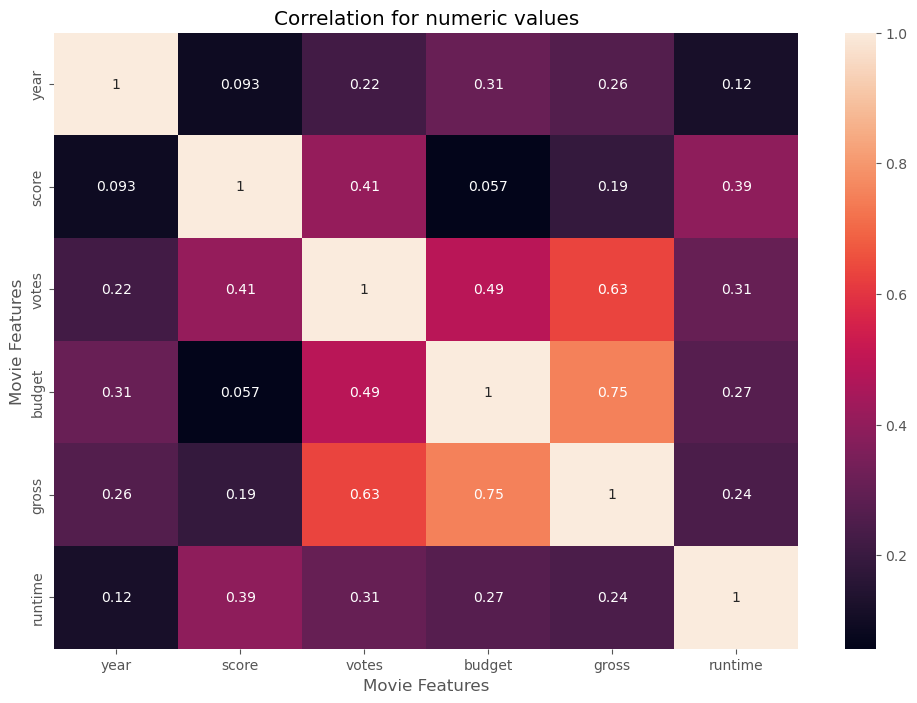

In [18]:
#Ploting heatmap for the numeric values using seaborn
cor_matrix = df.corr()
sns.heatmap(cor_matrix, annot = True)
plt.title('Correlation for numeric values')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

In [19]:
#Numerizing the whole column to find the correlation 
df_Numerized = df

for col_name in df_Numerized.columns:
    if (df_Numerized[col_name].dtype == 'object'):
        df_Numerized[col_name] = df_Numerized[col_name].astype('category')
        df_Numerized[col_name] = df_Numerized[col_name].cat.codes
        
df_Numerized.head()        

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Release_Date,Country Released
5445,533,6,0,2009,697,7.8,1100000.0,1155,1779,2335,56,237000000,2847246203,2254,162.0,610,56
7445,535,6,0,2019,184,8.4,903000.0,162,744,2242,56,356000000,2797501328,1607,181.0,153,56
3045,6896,6,6,1997,705,7.8,1100000.0,1155,1779,1596,56,200000000,2201647264,2254,194.0,616,56
6663,5144,6,0,2015,699,7.8,876000.0,1125,2551,525,56,245000000,2069521700,1541,138.0,612,56
7244,536,6,0,2018,193,8.4,897000.0,162,744,2242,56,321000000,2048359754,1607,149.0,161,56


In [ ]:
#checking the general correlation

df_Numerized.corr()


In [ ]:
#Creating Heatmap for the general table to see the correlation
corr_matrix = df_Numerized

sns.heatmap(corr_matrix, annot = True)

plt.title('Correlation for all values')
plt.xlabel('Movies Features')
plt.ylabel('Movies Features')
plt.show()